# bellabeatdata analysis with r

## Summary of the business task

Bellabeat is a manufacturer of high-tech health products for women. The company was founded in 2013 by Urška Sršen and Sando Mur and opened offices around the world in 2016. Most of its advertisement is on social media though they run ads on radios and billboards. The company offers 4 products namely:
- Bellabeat app which is installed on a smart phone and connects to their line of smart wellness products to track health data.
- Leaf wellness tracker which connects to the Bellabeat app and can be worn as a bracelet, clip, pendant. This supplies health data to the app.
- Time wellness watch which connects to the Bellabeat app to track health data.
- Spring smart water bottle which tracks daily water intake and connects to the Bellabeat app.
- Bellabeat membership (subscription based) program for users providing 24/7 access to fully personalized guidance on nutrition, activity, sleep, etc

#### The objective of this analysis is to 
1.	Identify trends in smart device usage
2.	Find out how these trends applies to Bellabeat customers
3.	Recommend how these trends could influence Bellabeat marketing strategy (wrt Bellabeat app)
Recommendations to be presented to Bellabeat executive team Urška Sršen and Sando Mur and some marketing executives. Presentation should be high-level recommendation.

#### Data source: FitBit Fitness Tracker Data [kaggle link](https://www.kaggle.com/arashnic/fitbit).
Data was downloaded as a zip file containing 18 datasets of daily, hourly and minute steps, calorie and intensities data from 30 FitBit users who consented to the submission of personal tracker data. The data was collected via a distributed survey by Amazon Mechanical Turk between 12th April 2016 and 12th May 2016. Data was stored locally. The datasets were organized in wide and long formats. 

#### Credibility and Bias
Research was conducted by [Amazon Mechanical Turk](https://www.mturk.com/), which is a reliable conductor of surveys and simple data validation (among others). Survey participants are authorized Amazon MTurk workers who own a FitBit. This presents a sampling bias because knowing as well as being accepted to become a worker on this platform and participating in this particular Human Intelligence Tasks (HITs) already excludes a large amount of people. Completed HITs also have to be accepted by the “Turker”, the criteria for acceptance is not outlined in the study. Also, eventhough MTurk workers are ethnically diverse, MTurk workers tend to be younger, more educated and lower on the income scale. Most workers are from US and India. This is not representative of US or general population [according to this](https://www.frontiersin.org/articles/10.3389/fpsyg.2017.01359/full#B94).
Apart from this, the data collection is credible as datapoints are collected by FitBit which is largely automated and not subject to human error 

#### Licensing and privacy:
The participants explicitly shared their data to participate in the study.

#### Relevance of the data:
The datasets contained data on daily/hourly/minute activity, calories, steps and intensities as well as data on sleep. These are relevant to the objective of the study.

## Data Analysis

In [1]:
#load packages
library("dplyr")
library("ggplot2")
library("lubridate")
library("readr")
library("cowplot")
library("gridExtra")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'cowplot' was built under R version 3.6.3"
Attaching package: 'cowplot'

The following object is masked from 'package:lubridate':

    stamp

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
#load datasets
daily_activity <- read_csv("dailyActivity_merged.csv")
hourly_calories <- read_csv("caloriesbyhour.csv")
hourly_intensities <- read_csv("intensitiesbyhour.csv")
daily_sleep <- read_csv("sleepbyday.csv")
weight <- read_csv("weightLogInfo_merged.csv")


-- Column specification --------------------------------------------------------
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)


-- Column specification --------------------------------------------------------
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  Calories = col_double()
)


-- Column specification --------------------------------------------------------
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  TotalIntensity = col_double(),
  AverageIntensity = col_double()


In [3]:
#check uploaded datasets
head(daily_activity)
str(daily_activity)
View(daily_activity)
View(hourly_calories)
str(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spec_tbl_df [940 x 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

ERROR: Error in View(daily_activity): 'View()' not yet supported in the Jupyter R kernel


In [6]:
library("dplyr")
#fixing date columns in hourly_intensities, hourly_calories, daily_activity
hourly_calories$ActivityHour <- as.POSIXct(hourly_calories$ActivityHour,
  format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensities$ActivityHour <- as.POSIXct(hourly_intensities$ActivityHour,
  format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
daily_activity$ActivityDate <- as.POSIXct(daily_activity$ActivityDate, 
  format = "%m/%d/%Y", tz = Sys.timezone())
#splitting the ActivityDate column into date and time 
hourly_calories$date <- format(hourly_calories$ActivityHour, 
  format = "%Y-%m-%d")
hourly_calories$time <- format(hourly_calories$ActivityHour,
  format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, 
  format = "%Y-%m-%d")
hourly_intensities$time <- format(hourly_intensities$ActivityHour,
  format = "%H:%M:%S")
daily_activity$date <- format(daily_activity$ActivityDate, 
  format = "%Y-%m-%d")
head(hourly_calories)
head(hourly_intensities)
head(daily_activity)

Id,ActivityHour,Calories,date,time
1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00
1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00
1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00
1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00
1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00
1503960366,2016-04-12 05:00:00,48,2016-04-12,05:00:00


Id,ActivityHour,TotalIntensity,AverageIntensity,date,time
1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00
1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00
1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00
1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00
1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00
1503960366,2016-04-12 05:00:00,0,0.000000,2016-04-12,05:00:00


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


## Data exploration 

In [8]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight$Id)
summary(daily_activity)
summary(hourly_calories)
summary(hourly_intensities)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

       Id             ActivityDate                   TotalSteps   
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :    0  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.: 3790  
 Median :4.445e+09   Median :2016-04-26 00:00:00   Median : 7406  
 Mean   :4.855e+09   Mean   :2016-04-26 06:53:37   Mean   : 7638  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:10727  
 Max.   :8.878e+09   Max.   :2016-05-12 00:00:00   Max.   :36019  
 TotalDistance    TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.490   Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.713   3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :28.030   Max.   :4.9421        

       Id             ActivityHour                    Calories     
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   : 42.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 01:00:00   1st Qu.: 63.00  
 Median :4.445e+09   Median :2016-04-26 06:00:00   Median : 83.00  
 Mean   :4.848e+09   Mean   :2016-04-26 11:46:42   Mean   : 97.39  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03 19:00:00   3rd Qu.:108.00  
 Max.   :8.878e+09   Max.   :2016-05-12 15:00:00   Max.   :948.00  
     date               time          
 Length:22099       Length:22099      
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

       Id             ActivityHour                 TotalIntensity  
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :  0.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 01:00:00   1st Qu.:  0.00  
 Median :4.445e+09   Median :2016-04-26 06:00:00   Median :  3.00  
 Mean   :4.848e+09   Mean   :2016-04-26 11:46:42   Mean   : 12.04  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03 19:00:00   3rd Qu.: 16.00  
 Max.   :8.878e+09   Max.   :2016-05-12 15:00:00   Max.   :180.00  
 AverageIntensity     date               time          
 Min.   :0.0000   Length:22099       Length:22099      
 1st Qu.:0.0000   Class :character   Class :character  
 Median :0.0500   Mode  :character   Mode  :character  
 Mean   :0.2006                                        
 3rd Qu.:0.2667                                        
 Max.   :3.0000                                        

**Some observations**

- data were submitted by 33 FitBit users in the daily_activity, hourly_calories and hourly_calories dataset. 
- 24 FitBit users submitted data for the daily_sleep dataset.
- 8 users submitted data for the weight dataset
1. Average Total daily steps is 7,711 which is below the recommended daily 10,000 steps which improves various health markers
2. Average VeryActiveMinutes is 21.37. This could mean that most people who "workout" prefer 20 minutes workouts. **Bellabeat could link complementary 20 mins workout videos to their app
3. Average Calories burned in a day is 2,325. To promote weightloss, calories consumed should lower than this figure for the average user.
4. Majority of the participants are lightly active
5. Average SedentaryMinutes is 994.4. This means that the average user is sedntary for 16 hoursveven when you take out 8 hours of sleep, this is still a lot of time being sedentary. **Bellabeat should promote content that encourages periodic movements to its users maybe through a notification. This will reduce sedentary lifestyle and increase calories burned and promote allround good health.


In [9]:
summary(daily_sleep)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

1. Average time asleep is 419.5 mins (appro 7 hours)
2. It typically takes 39 mins to fall asleep 

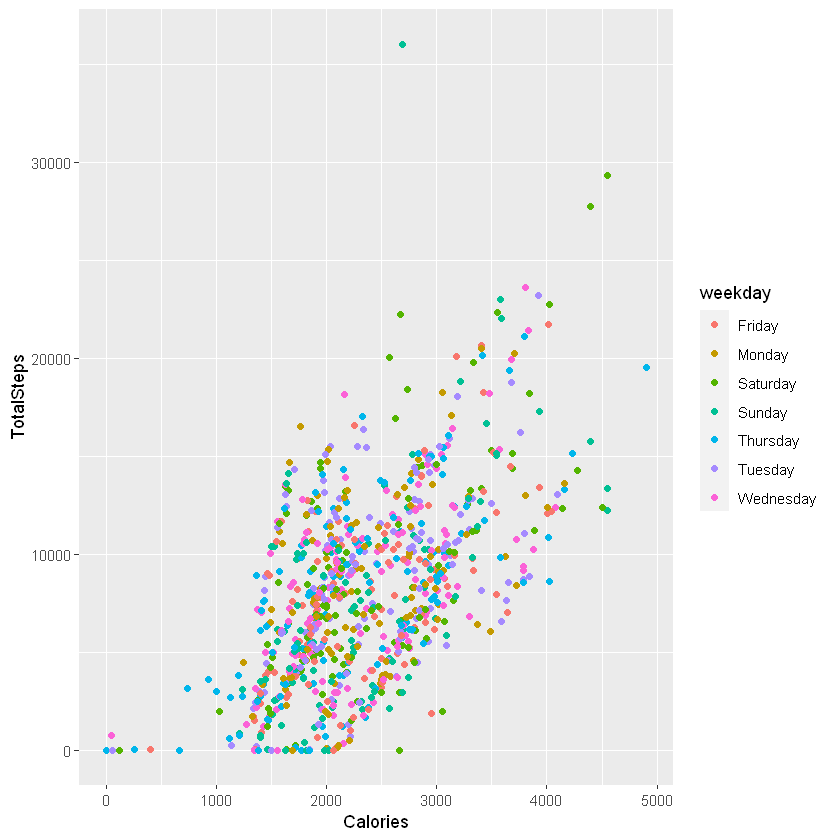

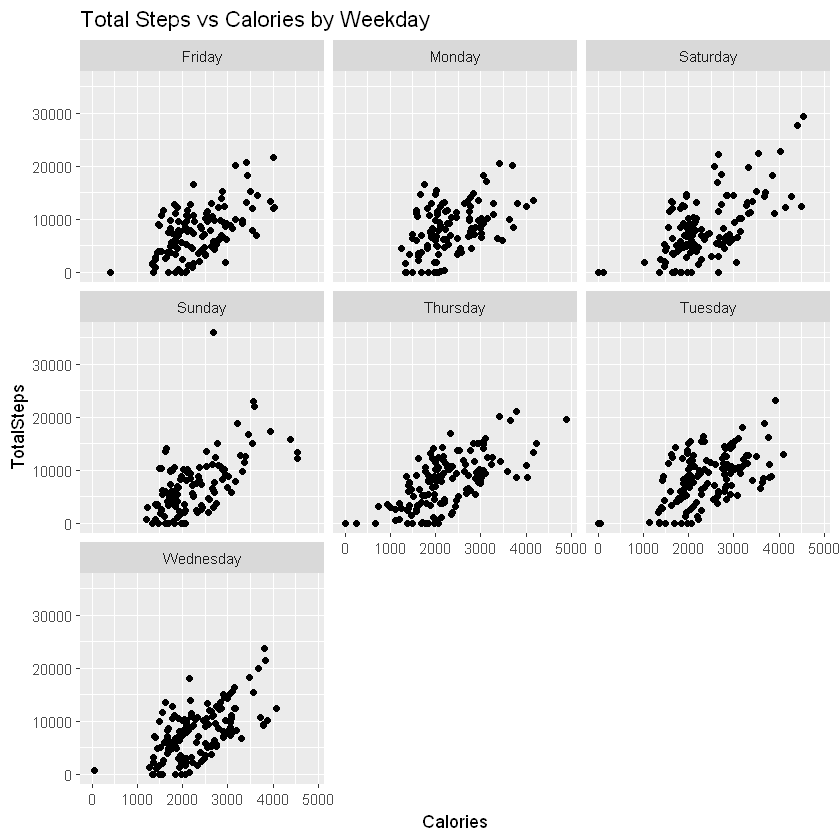

In [10]:
#create weekday column on daily_activity
daily_activity$weekday <- strftime(daily_activity$ActivityDate, "%A")

#plot Total steps vs calories by weekday
ggplot(daily_activity, aes(x=Calories, y=TotalSteps, color = weekday)) +
  geom_point()
ggplot(daily_activity, aes(Calories, TotalSteps)) +
  geom_point() +
  facet_wrap(~weekday) +
  labs(title = "Total Steps vs Calories by Weekday")

1. Total Steps and Calories are positively correlated which makes sense; you tend to burn more calories the more you move.
2. More participants burn more than 4000 calories on saturdays.

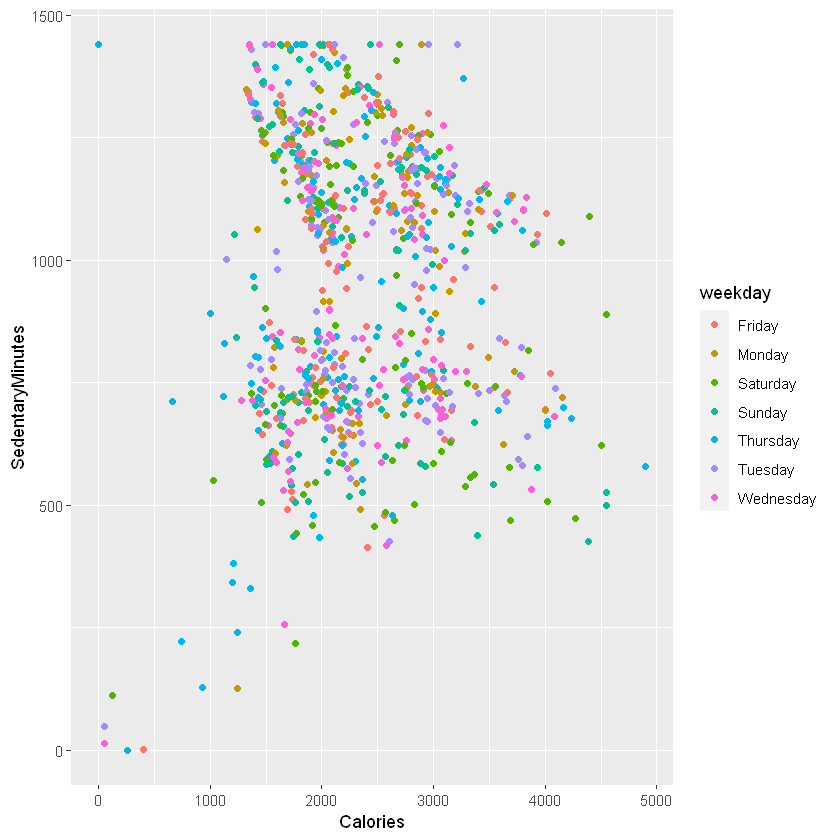

In [11]:
#plot sedentaryMinutes vs Calories by weekday
ggplot(daily_activity, aes(x=Calories, y=SedentaryMinutes, color = weekday)) +
  geom_point()

1. There ia a negative correlation between Sedentary Minutes and Calories which also makes sense.
2. saturday is the weekday participants are least sedentary

**Exerice intensity and weightloss

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message:
"Computation failed in `stat_smooth()`:
object ' loess' of mode 'function' was not found"`geom_smooth()` using formula 'y ~ x'


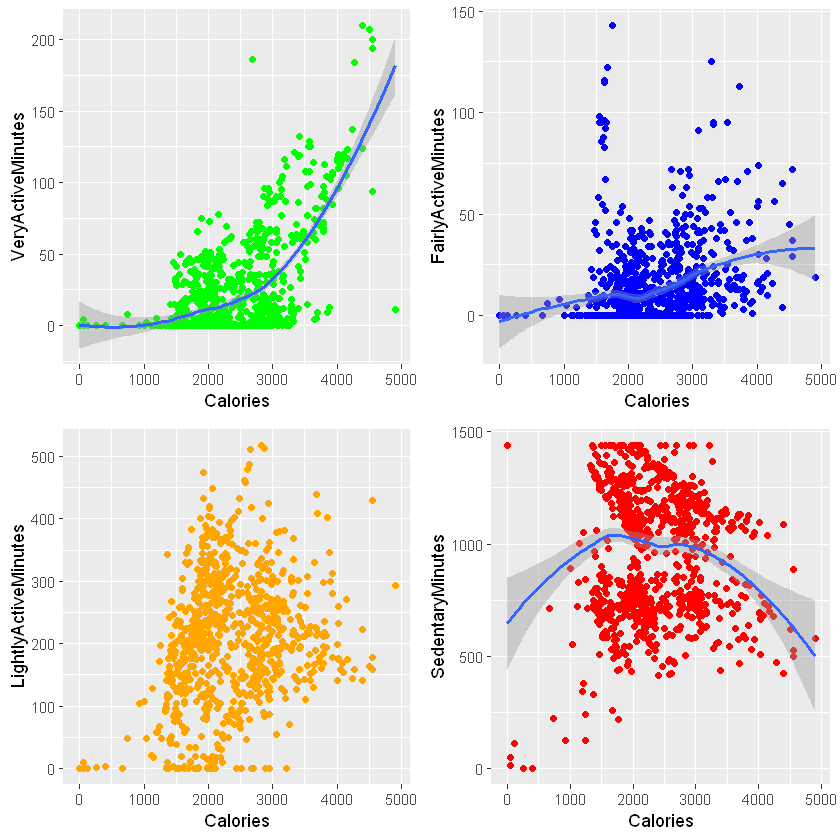

In [12]:
very_active <- ggplot(daily_activity, aes(Calories, VeryActiveMinutes)) +
  geom_point(color = "Green") +
  geom_smooth(method = "loess")
fairly_active <- ggplot(daily_activity, aes(Calories, FairlyActiveMinutes)) +
  geom_point(color = "Blue") +
  geom_smooth(method = "loess")
lightly_active <- ggplot(daily_activity, aes(Calories, LightlyActiveMinutes)) +
  geom_point(color = "orange") +
  geom_smooth(method = " loess")
sedentary <- ggplot(daily_activity, aes(Calories, SedentaryMinutes)) +
  geom_point(color = "Red") +
  geom_smooth(method = "loess")
plot_grid(very_active, fairly_active, lightly_active, sedentary)

- This shows that calories burned increases drastically for participants who were very active for more than 25 mins. It remains flat if fairly or lightly active.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

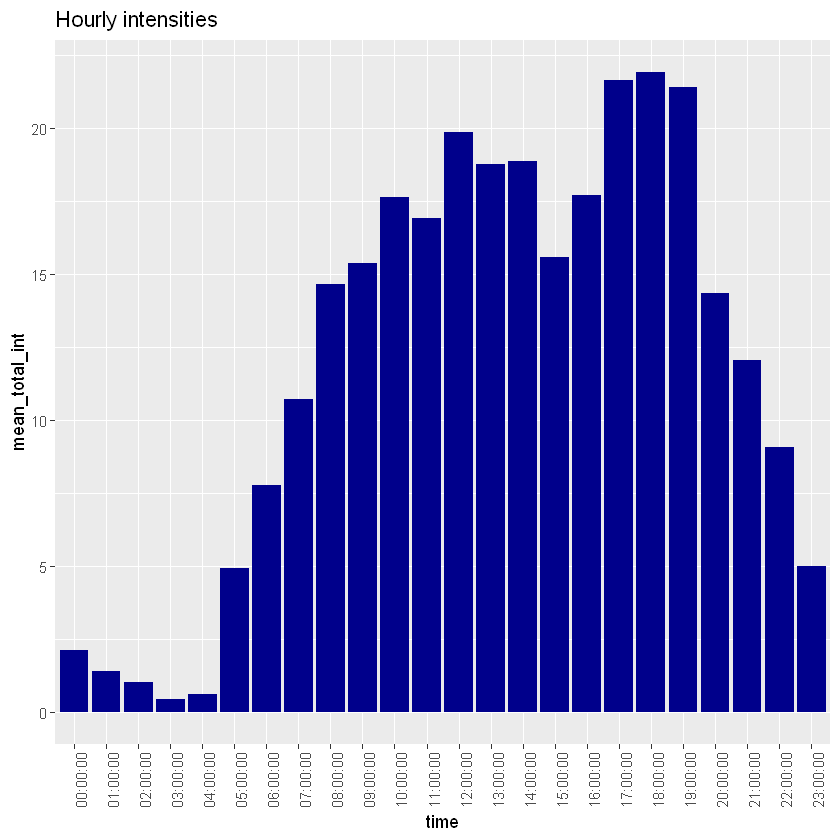

In [16]:
#explore Hourly Intensities and hourly calories
new_intensity <- hourly_intensities %>%
  group_by(time) %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(new_intensity, aes(x= time, y = mean_total_int)) +
  geom_histogram(stat = "identity" , fill = "darkblue") +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Hourly intensities")

- participants are most active between 5pm and 7pm and least active between 12midnight to 4am

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

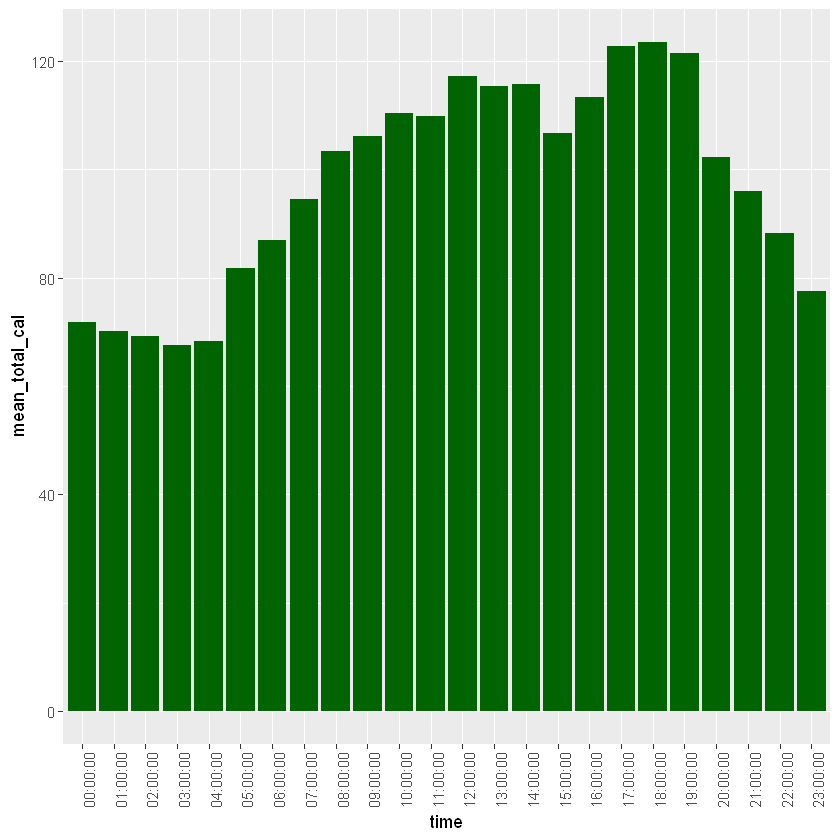

In [18]:
#explore hourly calories
new_cal <- hourly_calories %>%
  group_by(time) %>%
  summarise(mean_total_cal = mean(Calories))

ggplot(new_cal, aes(x= time, y = mean_total_cal)) +
  geom_histogram(stat = "identity" , fill = "darkgreen") +
  theme(axis.text.x = element_text(angle = 90))

1. Least calories burned (mostly baseline metabolism) is aroun 60 to 70 calories per hour between 12 midnight to 4am 
2. Eventhough intensity is very low around 12 midnight till 4am, there is a less dramatic difference between calories burned by hour and intensity per hour. This shows that intensity of the exercise is only one of factors that contribute to weight loss. **Bellabeat should incorporate weightloss strategies other than exercise

**Merge daily_activity and daily_sleep

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
1503960366,2016-04-12,1,327,346,2016-04-12
1503960366,2016-04-13,2,384,407,2016-04-13
1503960366,2016-04-15,1,412,442,2016-04-15
1503960366,2016-04-16,2,340,367,2016-04-16
1503960366,2016-04-17,1,700,712,2016-04-17
1503960366,2016-04-19,1,304,320,2016-04-19


Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,...,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday
1503960366,2016-04-12,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,...,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,...,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-15,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,...,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,...,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,...,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday
1503960366,2016-04-19,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,...,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

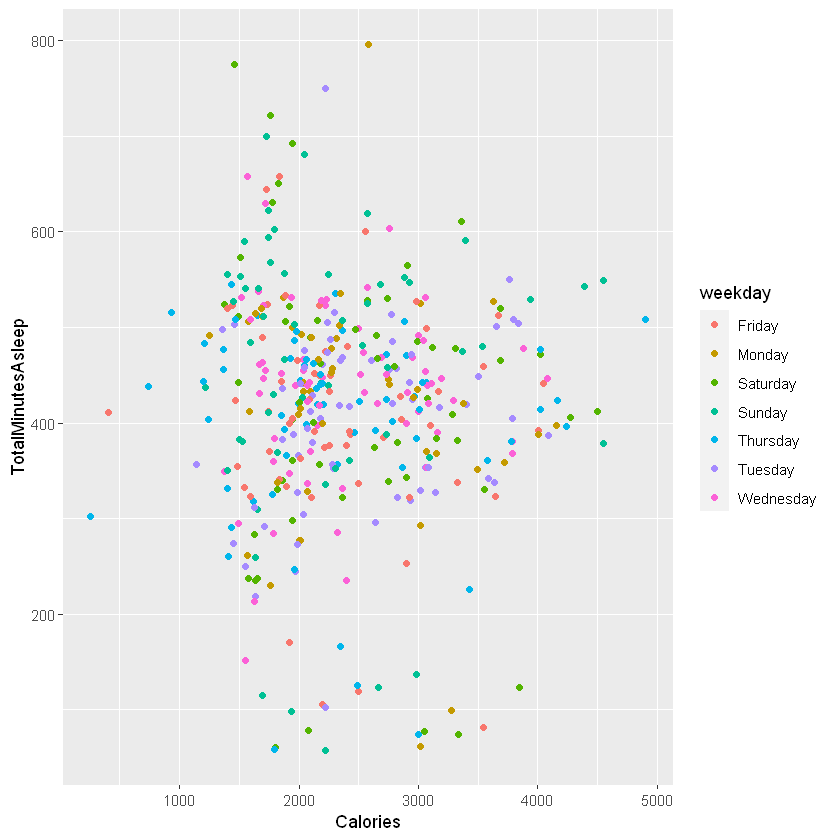

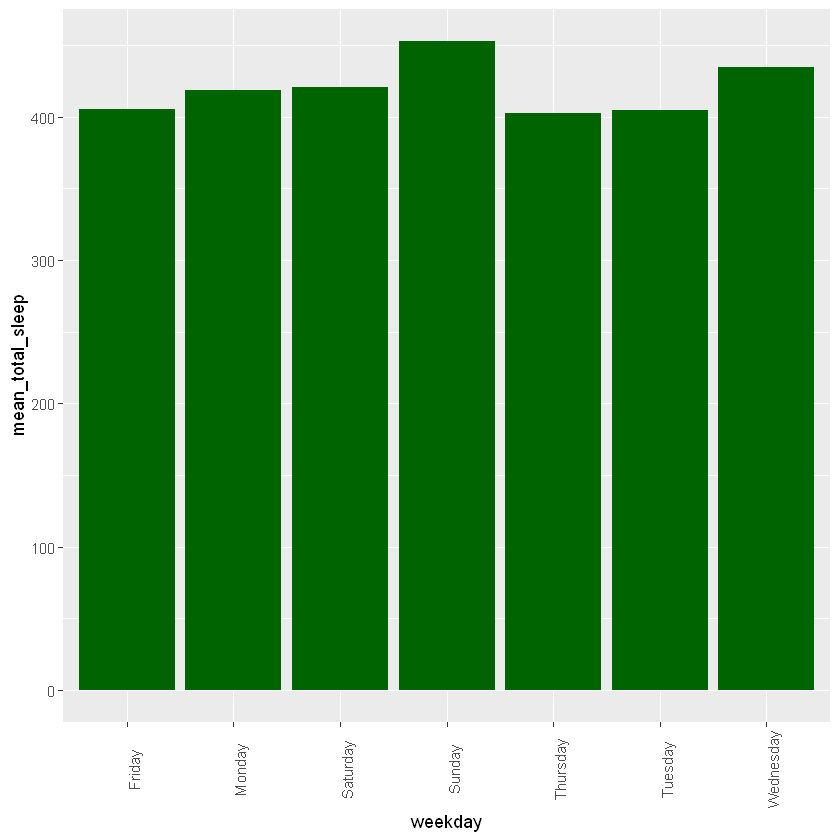

In [21]:
#create date column in daily_sleep for the merge
daily_sleep$SleepDay <- as.POSIXct(daily_sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p")
daily_sleep$date <- format(daily_sleep$SleepDay, format = "%Y-%m-%d")

head(daily_sleep)
#merge
sleep_activity <- merge(daily_sleep, daily_activity, by = c('Id', 'date'))
head(sleep_activity)

#Relationship between Time slept and Calories burned 
ggplot(sleep_activity, aes(Calories, TotalMinutesAsleep, color = weekday)) +
  geom_point()
#weak relationship between time asleep and calories burnt.
new_sleep <- sleep_activity %>%
  group_by(weekday) %>%
  summarise(mean_total_sleep = mean(TotalMinutesAsleep))

ggplot(new_sleep, aes(x= weekday, y = mean_total_sleep)) +
  geom_histogram(stat = "identity" , fill = "darkgreen") +
  theme(axis.text.x = element_text(angle = 90))

- Participants slept the most on Sundays (451 mins, approx 8 hours) and on Wednesdays (440 mins, 7 hours, 30 mins). 
- And the least on Tuesdays and Thursdays.